In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as spla
import scipy.sparse as sps
import math
from importlib import reload
from functools import reduce

#Load various data and functions
import fundamental_gates #Useful single qutrit gates
import interaction_and_decay #parameters - change dephasing rates in here
import embed_functions #functions to embed 1/2-qutrit objects into many-qutrit operators
import gate_sequences #gate sequences for various gates we've discussed - ZZ4 gate sequence is the one actually used in expt
import evolution #functions to calculate evolution of initial state under gate sequence
import teleport

import state_prep
import sim_tools

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rho_EPR_07 = state_prep.EPR_init_07
rho_EPR_56 = state_prep.EPR_init_56
F_EPR_meas = 0.92
decoh = True
dephas = True

In [3]:
#Perform protocol for each state in the two-design states
Probabilities = []
Fidelities = []
print("ZZ4 Teleportation protocol fidelities: \n")
for ind, state in enumerate(state_prep.two_design_states):
    P_psi, F_psi = teleport.getPandF(gate_sequences.EF_scrambler_gatelist,
                            state,
                            rho_EPR_07,
                            rho_EPR_56,
                            F_EPR_meas,
                            decoh=decoh,
                            dephas=dephas)
    Probabilities.append(P_psi.real)
    Fidelities.append(F_psi.real)
    
teleport.print_report(Probabilities, Fidelities)

ZZ4 Teleportation protocol fidelities: 

P_psi = [0.121, 0.106, 0.105, 0.113, 0.112, 0.108, 0.109, 0.114, 0.111, 0.105, 0.109, 0.119]
F_psi = [0.676, 0.616, 0.586, 0.619, 0.619, 0.564, 0.52, 0.603, 0.553, 0.527, 0.561, 0.621]
<P> = 0.11109679030472373
<F> = 0.5886118895644121
<FP>/<P> = 0.5900084132532588




If we can get the EPR fidelity up to 95 for both qutrit pairs, then the max fidelity rises to 70


Perfect EPR prep, no decoherence or dephasing, perfect EPR measurement: 100%

Perfect EPR prep on Q5Q6, Imperfect EPR prep on Q0Q7, no decoherence or dephasing, perfect EPR measurement: 88%

Imperfect EPR prep on Q5Q6, Perfect EPR prep on Q0Q7, no decoherence or dephasing, perfect EPR measurement: 86%

Perfect EPR prep, no decoherence or dephasing, imperfect EPR measurement: 94%

Perfect EPR prep, with decoherence and dephasing, perfect EPR measurement: 81%

All sources of error: 62%

Multiply all single-error budgets: 57%

Everything bad except EPR measurement is perfect: 64%

Everything bad except EPR 07 preparation is perfect: 68%

Everything bad except EPR 56 preparation is perfect: 69%

Everything bad except no decoherence or dephasing: 73%

So it does seem like decoherence is our worst enemy right now, which sucks because that's the one thing we can't really change.  

## Sweeping EPR fidelities

In [4]:
EPR_fidelities = np.linspace(0.8, 1, 10)
tele_fidelities = []

for fid in EPR_fidelities:
    Probabilities = []
    Fidelities = []
    
    EPR_state = state_prep.EPR_w_depol(fid)
    for ind, state in enumerate(state_prep.two_design_states):
        P_psi, F_psi = teleport.getPandF(gate_sequences.EF_scrambler_gatelist,
                                state,
                                EPR_state,
                                EPR_state,
                                F_EPR_meas,
                                decoh=decoh,
                                dephas=dephas)
        Probabilities.append(P_psi.real)
        Fidelities.append(F_psi.real)
    tele_fidelities.append(np.mean(Fidelities))

Text(0,0.5,'Teleportation fidelity')

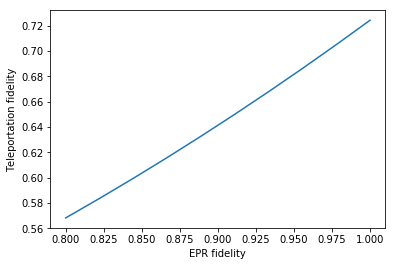

In [6]:
plt.plot(EPR_fidelities, tele_fidelities)
plt.xlabel('EPR fidelity')
plt.ylabel('Teleportation fidelity')

In [9]:
X = np.array([[0,1,0],[0,0,1],[1,0,0]])
Xdag = X.T

H = fundamental_gates.Hadamard
Hdag = np.conj(H).T

In [10]:
from functools import reduce
reduce(np.dot, [Xdag, H.T, X])

array([[-0.28867513+0.5j,  0.57735027+0.j , -0.28867513-0.5j],
       [ 0.57735027+0.j ,  0.57735027+0.j ,  0.57735027+0.j ],
       [-0.28867513-0.5j,  0.57735027+0.j , -0.28867513+0.5j]])